In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
# sklearn Models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Split data with stratified cv
from sklearn.model_selection import StratifiedKFold, train_test_split

# Encoding of classifications
from sklearn.preprocessing import LabelEncoder


In [2]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.activations import relu
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 

In [3]:
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall
from tensorflow.keras.utils import to_categorical, normalize

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset=pd.read_csv(r'/content/drive/MyDrive/2022/Research-Work/VPN-and-Non-VPN/VPN-Non-VPN.csv')
#dataset=pd.read_csv(r'/content/drive/MyDrive/Major/VPN NonVPN/vpn_NonVpn.csv')
dataset.head()

,Unnamed: 0,flow,src,src_port,dst,dst_port,protocol,timestamp,duration,total_fpackets,...,fHeaderSizeMin,mean_active_s,std_active_s,max_active_s,min_active_s,mean_idle_s,std_idle_s,max_idle_s,min_idle_s,label
0,0,131.202.6.26:13000<->10.8.8.222:13000,131.202.6.26,13000,10.8.8.222,61102,TCP,0,0.031114,3,...,40,3.111410e-11,0.0,3.111410e-11,0.0,0,0,0,0,1
1,1,10.8.8.222:61102<->131.202.6.26:61102,10.8.8.222,61102,131.202.6.26,13000,TCP,0,0.000094,2,...,40,9.393692e-14,0.0,9.393692e-14,0.0,0,0,0,0,1
2,2,131.202.6.26:13000<->10.8.8.222:13000,131.202.6.26,13000,10.8.8.222,61105,TCP,0,1.000000,1,...,40,0.000000e+00,0.0,0.000000e+00,0.0,0,0,0,0,1
3,3,10.8.8.222:61105<->131.202.6.26:61105,10.8.8.222,61105,131.202.6.26,13000,TCP,0,0.022047,2,...,40,2.204704e-11,0.0,2.204704e-11,0.0,0,0,0,0,1
4,4,10.8.8.222:61106<->131.202.6.26:61106,10.8.8.222,61106,131.202.6.26,13000,TCP,0,1.000000,1,...,40,0.000000e+00,0.0,0.000000e+00,0.0,0,0,0,0,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 85 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1195 non-null   int64  
 1   flow                1195 non-null   object 
 2   src                 1195 non-null   object 
 3   src_port            1195 non-null   int64  
 4   dst                 1195 non-null   object 
 5   dst_port            1195 non-null   int64  
 6   protocol            1195 non-null   object 
 7   timestamp           1195 non-null   int64  
 8   duration            1195 non-null   float64
 9   total_fpackets      1195 non-null   int64  
 10  total_bpackets      1195 non-null   int64  
 11  total_fpktl         1195 non-null   int64  
 12  total_bpktl         1195 non-null   int64  
 13  min_fpktl           1195 non-null   int64  
 14  max_fpktl           1195 non-null   int64  
 15  mean_fpktl          1195 non-null   float64
 16  std_fp

In [7]:
dataset.label.value_counts()

0    1122
1      73
Name: label, dtype: int64

In [8]:
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [9]:
#from sklearn import preprocessing 
#label_encoder = preprocessing.LabelEncoder() 
#dataset['class1']= label_encoder.fit_transform(dataset['class1']) 
#dataset['class1'].unique()

In [10]:
dataset.head(20)

,Unnamed: 0,flow,src,src_port,dst,dst_port,protocol,timestamp,duration,total_fpackets,...,fHeaderSizeMin,mean_active_s,std_active_s,max_active_s,min_active_s,mean_idle_s,std_idle_s,max_idle_s,min_idle_s,label
0,137,173.252.100.27:443<->131.202.240.150:443,173.252.100.27,443,131.202.240.150,56824,TCP,0,1.000000,1,...,52,0.000000e+00,0.0,0.000000e+00,0.0,0,0,0,0,0
1,186,131.202.240.150:47976<->23.195.220.179:47976,131.202.240.150,47976,23.195.220.179,443,TCP,0,0.000005,2,...,52,5.006790e-15,0.0,5.006790e-15,0.0,0,0,0,0,0
2,919,173.252.79.88:3478<->131.202.240.150:3478,173.252.79.88,3478,131.202.240.150,43116,TCP,0,1.000000,1,...,52,0.000000e+00,0.0,0.000000e+00,0.0,0,0,0,0,0
3,247,131.202.240.150:52729<->173.252.79.86:52729,131.202.240.150,52729,173.252.79.86,443,TCP,0,1.000000,1,...,52,0.000000e+00,0.0,0.000000e+00,0.0,0,0,0,0,0
4,800,131.202.240.150:50285<->173.252.79.80:50285,131.202.240.150,50285,173.252.79.80,443,TCP,0,1.000000,1,...,52,0.000000e+00,0.0,0.000000e+00,0.0,0,0,0,0,0
5,339,74.125.69.16:993<->131.202.240.87:10741,74.125.69.16,993,131.202.240.87,10741,TCP,0,0.009391,2,...,99,9.391069e-12,0.0,9.391069e-12,0.0,0,0,0,0,0
6,105,173.194.196.16:465<->131.202.240.242:465,173.194.196.16,465,131.202.240.242,5529,TCP,0,1.000000,1,...,40,0.000000e+00,0.0,0.000000e+00,0.0,0,0,0,0,0
7,264,173.252.79.86:443<->131.202.240.150:443,173.252.79.86,443,131.202.240.150,36199,TCP,0,1.000000,1,...,52,0.000000e+00,0.0,0.000000e+00,0.0,0,0,0,0,0
8,263,173.252.79.86:443<->131.202.240.150:443,173.252.79.86,443,131.202.240.150,51767,TCP,0,1.000000,1,...,52,0.000000e+00,0.0,0.000000e+00,0.0,0,0,0,0,0
9,320,131.202.240.87:10763<->173.194.196.16:465,131.202.240.87,10763,173.194.196.16,465,TCP,0,0.047170,1,...,75,4.717016e-11,0.0,4.717016e-11,0.0,0,0,0,0,0


In [12]:
features = dataset.iloc[:,8:84].values
labels = dataset.iloc [:,84].values

In [14]:
labels

array([0, 0, 0, ..., 0, 1, 0])

In [15]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [16]:
training_data, testing_data, training_label, testing_label = train_test_split(features, labels , test_size=0.2, shuffle=True, stratify=labels)

# Neural Network

In [16]:
model = Sequential()
model.add(Dense(units= 50, input_dim = training_data.shape[1], activation=relu))
#model.add(Dense(units= 50, input_dim = X_train.shape[1], activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), batch_size=64, epochs=50)
acc_testing  = model.evaluate(testing_data, testing_label)

Epoch 1/50
15/15 [==============================] - 3s 15ms/step - loss: 0.5971 - accuracy: 0.8410 - val_loss: 0.4834 - val_accuracy: 0.9372
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.3961 - accuracy: 0.9393 - val_loss: 0.3174 - val_accuracy: 0.9372
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 0.2686 - accuracy: 0.9393 - val_loss: 0.2424 - val_accuracy: 0.9372
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.2321 - accuracy: 0.9393 - val_loss: 0.2312 - val_accuracy: 0.9372
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.2269 - accuracy: 0.9393 - val_loss: 0.2276 - val_accuracy: 0.9372
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.2229 - accuracy: 0.9393 - val_loss: 0.2246 - val_accuracy: 0.9372
Epoch 7/50
15/15 [==============================] - 0s 5ms/step - loss: 0.2192 - accuracy: 0.9393 - val_loss: 0.2217 - val_accuracy: 0.9372
Epoch 8/50
15/15 [=

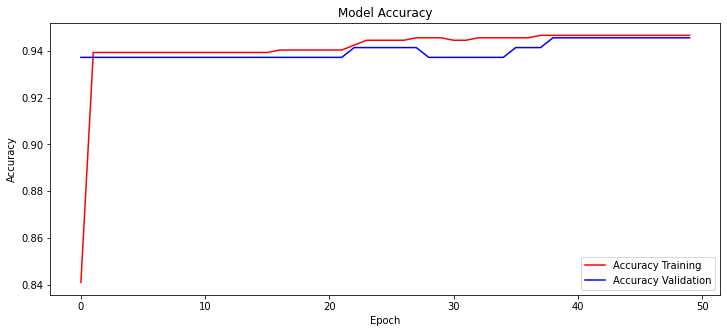

In [18]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Accuracy Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Accuracy Validation')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()

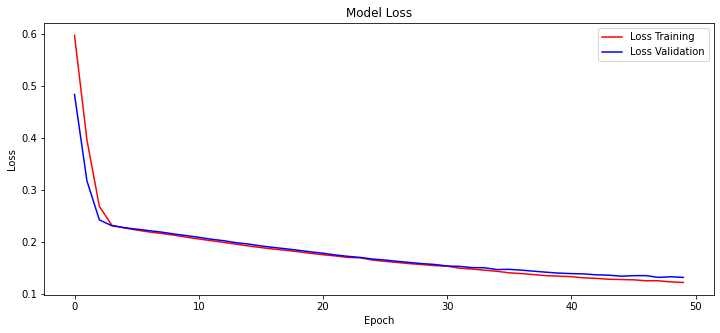

In [20]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validation')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()

In [21]:
training_predicted = model.predict(training_data)
testing_predicted = model.predict(testing_data)

In [22]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(training_label,training_predicted.round())
testing_cm = confusion_matrix(testing_label,testing_predicted.round())

In [23]:
testing_cm

tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.9456066945606695
Specificity testing 0.2
Sensitivity testing 0.9955357142857143
Precision testing 0.948936170212766
F1 Score testing 0.9716775599128541


Text(0, 0.5, 'Frequency')

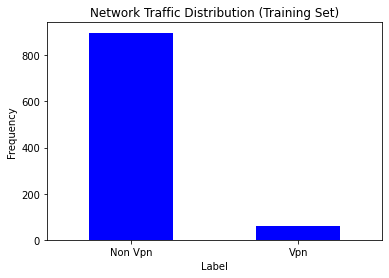

In [24]:
label_l = ['Non Vpn', 'Vpn']
classes = pd.value_counts(training_label,)
classes.plot(kind = 'bar', rot = 0, color = "blue")
plt.title("Network Traffic Distribution (Training Set)")
plt.xticks(range(2), label_l)
plt.xlabel("Label")
plt.ylabel("Frequency")


In [25]:
from sklearn.neighbors import KNeighborsClassifier
import time

In [26]:
tic=time.time()
model = KNeighborsClassifier(n_neighbors=4,p=1 )
model.fit(training_data,  training_label)
Accuracy = model.score(testing_data, testing_label)
print(Accuracy)
toc=time.time()
print("Time Taken:")
print(toc-tic)

0.9665271966527197
Time Taken:
0.02671504020690918


In [27]:
Accuracy

0.9665271966527197

In [ ]:
X = dataset.iloc[:,8:84].values
y = dataset.iloc [:,84].values

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(features)


KMeans(n_clusters=2)

In [ ]:
pca_e = PCA(n_components=2)
pca_e_result = pca_e.fit_transform(features)

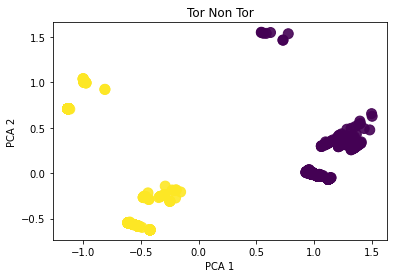

In [ ]:
x = pca_e_result[:, 0]
y = pca_e_result[:, 1]

scatter = plt.scatter(x, y, c=kmeans.labels_, alpha=0.9, s= 100)
plt.title('Tor Non Tor')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

In [ ]:

train_PCA = PCA(n_components=75).fit_transform(features)

In [ ]:
train_PCA

array([[ 9.33756469e-01,  1.53816951e-02, -4.96133524e-01, ...,
         5.30372998e-17,  3.84048659e-17, -4.30827081e-17],
       [-6.09740275e-01, -5.44959509e-01,  1.75410898e-02, ...,
        -6.35257341e-18, -4.10921254e-18,  7.59448274e-18],
       [ 1.02437858e+00, -2.16047985e-02, -4.16059606e-01, ...,
         5.05676288e-18,  1.33978686e-18, -6.68824085e-18],
       ...,
       [-6.09739568e-01, -5.44959254e-01,  1.75408430e-02, ...,
        -1.18284341e-18, -6.19551115e-18,  3.06824123e-19],
       [ 9.73301195e-01, -9.92993152e-03, -4.66898092e-01, ...,
         5.83140757e-19,  1.03403604e-18,  3.88096513e-18],
       [-5.21934477e-01, -5.85123216e-01,  1.02694615e-01, ...,
        -1.46075368e-17,  5.71071738e-20, -2.31351225e-18]])

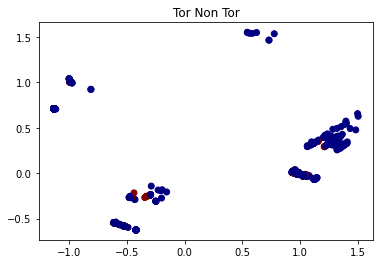

In [ ]:
import matplotlib
%matplotlib inline
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
plt.title('Tor Non Tor')
plt.scatter(train_PCA[:,0],train_PCA[:,1],c=labels,cmap=plt.cm.jet)

In [ ]:
from sklearn.manifold import TSNE
train_tsne = TSNE(n_components=2).fit_transform(features)
tsne_df = pd.DataFrame({'tsne1':train_tsne[:,0],
                        'tsne2':train_tsne[:,1],
                        'labels':labels})

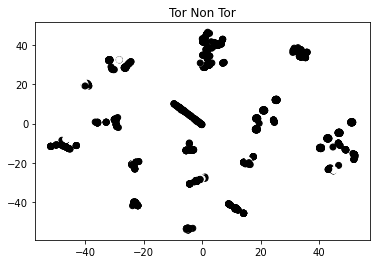

In [ ]:
plt.title('Tor Non Tor')
plt.scatter(train_tsne[:,0],train_tsne[:,1],c=labels,cmap='CMRmap')

In [ ]:
pca = PCA(n_components=2)
X_transform = pca.fit_transform(features)
X_transform

array([[ 0.93375647,  0.0153817 ],
       [-0.60974027, -0.54495951],
       [ 1.02437858, -0.0216048 ],
       ...,
       [-0.60973957, -0.54495925],
       [ 0.9733012 , -0.00992993],
       [-0.52193448, -0.58512322]])

In [ ]:
X_transform = pd.DataFrame(data = X_transform, columns = ["principal component 1", "principal component 2"])


In [ ]:
from sklearn import svm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, labels, test_size=0.40, random_state=32)
clf = svm.SVC(kernel='linear')

In [ ]:
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       442
           1       0.00      0.00      0.00        36

    accuracy                           0.92       478
   macro avg       0.46      0.50      0.48       478
weighted avg       0.86      0.92      0.89       478



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier as DT

In [ ]:
classifier = DT(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       442
           1       0.74      0.64      0.69        36

    accuracy                           0.96       478
   macro avg       0.86      0.81      0.83       478
weighted avg       0.95      0.96      0.95       478



In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF

In [ ]:
classifier = RF(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       442
           1       0.79      0.64      0.71        36

    accuracy                           0.96       478
   macro avg       0.88      0.81      0.84       478
weighted avg       0.96      0.96      0.96       478



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       442
           1       0.00      0.00      0.00        36

    accuracy                           0.92       478
   macro avg       0.46      0.50      0.48       478
weighted avg       0.86      0.92      0.89       478



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SMOTE

In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF


from collections import Counter

In [18]:
#df = pd.read_csv(r'/content/drive/MyDrive/Major/VPN NonVPN/vpn_NonVpn.csv')
df=pd.read_csv(r'/content/drive/MyDrive/2022/Research-Work/VPN-and-Non-VPN/VPN-Non-VPN.csv')
df = df.sample(frac=1).reset_index(drop=True)
df.shape

(1195, 85)

In [19]:
df['label'].value_counts()

0    1122
1      73
Name: label, dtype: int64

In [20]:
df.isnull().sum()

Unnamed: 0     0
flow           0
src            0
src_port       0
dst            0
              ..
mean_idle_s    0
std_idle_s     0
max_idle_s     0
min_idle_s     0
label          0
Length: 85, dtype: int64

In [21]:
mainx= df.iloc[:,8:84].values
mainy = df.iloc [:,84].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(mainx, mainy, test_size=0.40, random_state=32)

In [23]:
y_train.shape, y_test.shape

((717,), (478,))

In [24]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [25]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 677, 1: 40})
After Counter({0: 677, 1: 677})


In [26]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
mainx = Scaler_X.fit_transform(mainx)
#X_test = Scaler_X.transform(X_test)

In [27]:

counter = Counter(mainy)
print('Before',counter)
smt = SMOTE()
x_sm, y_sm = smt.fit_resample(mainx, mainy)
counter = Counter(y_sm)
print('After',counter)

Before Counter({0: 1122, 1: 73})
After Counter({0: 1122, 1: 1122})


In [28]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x_sm, y_sm, train_size=0.8, stratify = y_sm, random_state=100)
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [29]:
tic=time.time()
model = KNeighborsClassifier(n_neighbors=16,p=1 )
model.fit(X_train, y_train)
Accuracy = model.score(X_test, y_test)
print(Accuracy)
print("Time Taken without PCA:")
toc=time.time()
print(toc-tic)

NameError: ignored

up to here

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_sm = Scaler_X.fit_transform(x_sm)


In [ ]:
encoder = Sequential()
encoder.add(Dense(units = 2, 
                  activation = 'relu', 
                  input_shape = [76]))

decoder = Sequential()
decoder.add(Dense(units = 76, 
                  activation = 'relu',
                  input_shape = [2]))

In [ ]:
Autoencoder = Sequential([encoder, decoder])

In [ ]:

from tensorflow.keras.optimizers import Adam

Autoencoder.compile(loss = 'mse', optimizer= 'adam')


In [ ]:
Autoencoder.fit(X_sm,
                X_sm,
                epochs = 500)

Epoch 1/500
71/71 [==============================] - 1s 2ms/step - loss: 0.4783
Epoch 2/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4783
Epoch 3/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4777
Epoch 4/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4771
Epoch 5/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4777
Epoch 6/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4769
Epoch 7/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4781
Epoch 8/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4774
Epoch 9/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4767
Epoch 10/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4780
Epoch 11/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4777
Epoch 12/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4778
Epoch 13/500
71/71 [=================

71/71 [==============================] - 0s 2ms/step - loss: 0.4679
Epoch 203/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4666
Epoch 204/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4668
Epoch 205/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4668
Epoch 206/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4660
Epoch 207/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4661
Epoch 208/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4664
Epoch 209/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4660
Epoch 210/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4663
Epoch 211/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4667
Epoch 212/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4674
Epoch 213/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4658
Epoch 214/500
71/71 [=========

71/71 [==============================] - 0s 2ms/step - loss: 0.4640
Epoch 303/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4638
Epoch 304/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4642
Epoch 305/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4636
Epoch 306/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4642
Epoch 307/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4637
Epoch 308/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4635
Epoch 309/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4643
Epoch 310/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4639
Epoch 311/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4645
Epoch 312/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4647
Epoch 313/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4635
Epoch 314/500
71/71 [=========

71/71 [==============================] - 0s 2ms/step - loss: 0.4621
Epoch 403/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4618
Epoch 404/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4619
Epoch 405/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4622
Epoch 406/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4627
Epoch 407/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4628
Epoch 408/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4631
Epoch 409/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4642
Epoch 410/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4657
Epoch 411/500
71/71 [==============================] - 0s 3ms/step - loss: 0.4632
Epoch 412/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4626
Epoch 413/500
71/71 [==============================] - 0s 2ms/step - loss: 0.4618
Epoch 414/500
71/71 [=========

In [ ]:
features_2d = encoder.predict(X_sm)

In [ ]:
features_2d.shape

(2244, 2)

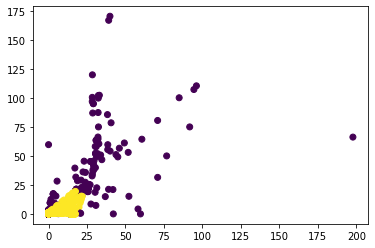

In [ ]:
plt.scatter(features_2d[:,0],features_2d[:,1], c = y_sm);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=32)
from sklearn.metrics import classification_report

In [ ]:
import time
tic=time.time()
model = KNeighborsClassifier(n_neighbors=4,p=1 )
model.fit(X_train, y_train)
Accuracy = model.score(X_test, y_test)
print(Accuracy)
print("Time Taken with AutoEncoder for KNN:")
toc=time.time()
print(toc-tic)

0.9866369710467706
Time Taken with AutoEncoder for KNN:
0.14058852195739746


In [ ]:
tic=time.time()
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken with autoencoder for SVM:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       214
           1       0.88      1.00      0.94       235

    accuracy                           0.93       449
   macro avg       0.94      0.93      0.93       449
weighted avg       0.94      0.93      0.93       449

Time Taken with autoencoder for SVM:
0.2094554901123047


In [ ]:
tic=time.time()
classifier = DT(criterion='gini', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken for Decision Tree with autoencoder:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       214
           1       0.99      0.99      0.99       235

    accuracy                           0.99       449
   macro avg       0.99      0.99      0.99       449
weighted avg       0.99      0.99      0.99       449

Time Taken for Decision Tree with autoencoder:
0.035901546478271484


In [ ]:
tic=time.time()
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken with autoencoder for Logistic Regression:")
print(toc-tic)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       214
           1       0.91      1.00      0.95       235

    accuracy                           0.95       449
   macro avg       0.95      0.94      0.95       449
weighted avg       0.95      0.95      0.95       449

Time Taken with autoencoder for Logistic Regression:
0.07779383659362793


In [ ]:
tic=time.time()
classifier = RF(n_estimators=4, criterion='gini', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken with autoencoder for Random Forest:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       214
           1       0.99      0.98      0.98       235

    accuracy                           0.98       449
   macro avg       0.98      0.98      0.98       449
weighted avg       0.98      0.98      0.98       449

Time Taken with autoencoder for Random Forest:
0.04487943649291992


# LDA

In [42]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x_sm, y_sm, train_size=0.4, stratify = y_sm, random_state=100)
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()


In [43]:

# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [44]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
  
# plot the scatterplot


In [45]:
tic=time.time()
classifier = DT(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken for Decision Tree with LDA:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       674
           1       0.96      0.95      0.96       673

    accuracy                           0.96      1347
   macro avg       0.96      0.96      0.96      1347
weighted avg       0.96      0.96      0.96      1347

Time Taken for Decision Tree with LDA:
0.011546134948730469


In [46]:
import time
tic=time.time()
model = KNeighborsClassifier(n_neighbors=4,p=1 )
model.fit(X_train, y_train)
Accuracy = model.score(X_test, y_test)
print(Accuracy)
print("Time Taken with LDA for KNN:")
toc=time.time()
print(toc-tic)

0.9643652561247216
Time Taken with LDA for KNN:
0.038495540618896484


In [47]:
tic=time.time()
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier(n_estimators=150)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken for Xgboost:")
print(toc-tic)


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       674
           1       0.96      0.98      0.97       673

    accuracy                           0.97      1347
   macro avg       0.97      0.97      0.97      1347
weighted avg       0.97      0.97      0.97      1347

Time Taken for Xgboost:
0.45780277252197266


In [48]:
METRICS = [

      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
]
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

NameError: ignored

In [ ]:
model = Sequential()
model.add(Dense(units= 50, input_dim = X_train.shape[1], activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=METRICS)

In [ ]:
acc_training = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=50)
#acc_testing  = model.evaluate(testing_data, testing_label)

Epoch 1/50
15/15 [==============================] - 0s 13ms/step - loss: 0.1516 - accuracy: 0.9498 - precision: 0.9089 - recall: 1.0000 - auc: 0.9725 - val_loss: 0.3540 - val_accuracy: 0.9465 - val_precision: 0.9044 - val_recall: 0.9985 - val_auc: 0.9574
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 0.1513 - accuracy: 0.9498 - precision: 0.9089 - recall: 1.0000 - auc: 0.9725 - val_loss: 0.3492 - val_accuracy: 0.9458 - val_precision: 0.9043 - val_recall: 0.9970 - val_auc: 0.9593
Epoch 3/50
15/15 [==============================] - 0s 10ms/step - loss: 0.1509 - accuracy: 0.9498 - precision: 0.9089 - recall: 1.0000 - auc: 0.9712 - val_loss: 0.3493 - val_accuracy: 0.9458 - val_precision: 0.9043 - val_recall: 0.9970 - val_auc: 0.9597
Epoch 4/50
15/15 [==============================] - 0s 12ms/step - loss: 0.1508 - accuracy: 0.9498 - precision: 0.9089 - recall: 1.0000 - auc: 0.9720 - val_loss: 0.3487 - val_accuracy: 0.9458 - val_precision: 0.9043 - val_recall: 0.9970

# Autoencoder

In [49]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_sm = Scaler_X.fit_transform(x_sm)


In [ ]:
encoder = Sequential()
encoder.add(Dense(units = 16, 
                  activation = 'relu', 
                  input_shape = [76]))

decoder = Sequential()
decoder.add(Dense(units = 76, 
                  activation = 'relu',
                  input_shape = [16]))

In [ ]:
Autoencoder = Sequential([encoder, decoder])

In [ ]:
from tensorflow.keras.optimizers import Adam

Autoencoder.compile(loss = 'mse', optimizer= 'adam')

In [ ]:
Autoencoder.fit(X_sm,
                X_sm,
                epochs = 50)

Epoch 1/50
71/71 [==============================] - 1s 3ms/step - loss: 0.7635
Epoch 2/50
71/71 [==============================] - 0s 3ms/step - loss: 0.6799
Epoch 3/50
71/71 [==============================] - 0s 2ms/step - loss: 0.6095
Epoch 4/50
71/71 [==============================] - 0s 2ms/step - loss: 0.5405
Epoch 5/50
71/71 [==============================] - 0s 2ms/step - loss: 0.4853
Epoch 6/50
71/71 [==============================] - 0s 3ms/step - loss: 0.4439
Epoch 7/50
71/71 [==============================] - 0s 3ms/step - loss: 0.4118
Epoch 8/50
71/71 [==============================] - 0s 3ms/step - loss: 0.3803
Epoch 9/50
71/71 [==============================] - 0s 3ms/step - loss: 0.3532
Epoch 10/50
71/71 [==============================] - 0s 3ms/step - loss: 0.3336
Epoch 11/50
71/71 [==============================] - 0s 3ms/step - loss: 0.3173
Epoch 12/50
71/71 [==============================] - 0s 2ms/step - loss: 0.3042
Epoch 13/50
71/71 [==============================

In [ ]:
features_2d = encoder.predict(X_sm)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_2d, y_sm, test_size=0.20, random_state=32)
from sklearn.metrics import classification_report

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1795, 16), (449, 16), (1795,), (449,))

In [ ]:
import time
tic=time.time()
model = KNeighborsClassifier(n_neighbors=1,p=1 )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print("Time Taken with AutoEncoder for KNN:")
toc=time.time()
print(toc-tic)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       208
           1       0.99      0.99      0.99       241

    accuracy                           0.99       449
   macro avg       0.99      0.99      0.99       449
weighted avg       0.99      0.99      0.99       449

Time Taken with AutoEncoder for KNN:
0.11305451393127441


In [ ]:
tic=time.time()
classifier = DT(criterion='gini', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken for Decision Tree with autoencoder:")
print(toc-tic)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       208
           1       0.98      0.98      0.98       241

    accuracy                           0.98       449
   macro avg       0.98      0.98      0.98       449
weighted avg       0.98      0.98      0.98       449

Time Taken for Decision Tree with autoencoder:
0.03627204895019531


In [ ]:
tic=time.time()
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier(n_estimators=150)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred))
toc=time.time()
print("Time Taken for Xgboost:")
print(toc-tic)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       208
           1       0.98      0.98      0.98       241

    accuracy                           0.98       449
   macro avg       0.98      0.98      0.98       449
weighted avg       0.98      0.98      0.98       449

Time Taken for Xgboost:
0.38523411750793457


In [ ]:
acc_training = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=150)
#acc_testing  = model.evaluate(testing_data, testing_label)

Epoch 1/150
29/29 [==============================] - 6s 20ms/step - loss: 0.6107 - accuracy: 0.6758 - precision: 0.7794 - recall: 0.4733 - auc: 0.7808 - val_loss: 0.5411 - val_accuracy: 0.7572 - val_precision: 0.7075 - val_recall: 0.9336 - val_auc: 0.8865
Epoch 2/150
29/29 [==============================] - 0s 3ms/step - loss: 0.5124 - accuracy: 0.8162 - precision: 0.7725 - recall: 0.8865 - auc: 0.8818 - val_loss: 0.4790 - val_accuracy: 0.8441 - val_precision: 0.8519 - val_recall: 0.8589 - val_auc: 0.9066
Epoch 3/150
29/29 [==============================] - 0s 4ms/step - loss: 0.4631 - accuracy: 0.8290 - precision: 0.8203 - recall: 0.8343 - auc: 0.8888 - val_loss: 0.4347 - val_accuracy: 0.8508 - val_precision: 0.8425 - val_recall: 0.8880 - val_auc: 0.9136
Epoch 4/150
29/29 [==============================] - 0s 4ms/step - loss: 0.4183 - accuracy: 0.8306 - precision: 0.8132 - recall: 0.8502 - auc: 0.9066 - val_loss: 0.3957 - val_accuracy: 0.8664 - val_precision: 0.8635 - val_recall: 0.89

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       208
           1       0.94      0.99      0.96       241

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



ANN

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras import backend as K


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# Import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,Dropout,BatchNormalization
from tensorflow.keras.optimizers import *
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.metrics import *
# v4

ACCURACY_LIST = []

from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.models import Model

METRICS = [

      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
]

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [ ]:
model = Sequential()
model.add(Dense(units= 50, input_dim = X_train.shape[1], activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=METRICS)

In [ ]:
acc_training = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=64, epochs=50)
#acc_testing  = model.evaluate(testing_data, testing_label)

Epoch 1/50
29/29 [==============================] - 3s 32ms/step - loss: 0.5550 - accuracy: 0.7304 - precision: 0.6840 - recall: 0.8377 - auc: 0.8034 - val_loss: 0.4690 - val_accuracy: 0.8307 - val_precision: 0.8185 - val_recall: 0.8797 - val_auc: 0.8894
Epoch 2/50
29/29 [==============================] - 0s 8ms/step - loss: 0.4631 - accuracy: 0.7983 - precision: 0.7830 - recall: 0.8150 - auc: 0.8766 - val_loss: 0.4165 - val_accuracy: 0.8218 - val_precision: 0.8038 - val_recall: 0.8838 - val_auc: 0.9038
Epoch 3/50
29/29 [==============================] - 0s 6ms/step - loss: 0.4116 - accuracy: 0.8134 - precision: 0.7993 - recall: 0.8275 - auc: 0.8930 - val_loss: 0.3746 - val_accuracy: 0.8731 - val_precision: 0.8833 - val_recall: 0.8797 - val_auc: 0.9211
Epoch 4/50
29/29 [==============================] - 0s 6ms/step - loss: 0.3734 - accuracy: 0.8451 - precision: 0.8430 - recall: 0.8411 - auc: 0.9212 - val_loss: 0.3428 - val_accuracy: 0.8775 - val_precision: 0.8908 - val_recall: 0.8797 -